In [123]:
import json
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# ISTANBUL ÇALIŞMASI

In [124]:
istanbul = pd.read_csv(r"C:\Users\emrecan.ulu.DESKTOP-4T87DPH\Desktop\türkiye\türkiye_monthly.csv")
istanbul = istanbul.drop(columns=("index"))
istanbul = istanbul.drop(columns=("Unnamed: 0"))
istanbul = istanbul.loc[istanbul.city == "İstanbul"]
istanbul.reset_index(drop=True, inplace=True)

In [125]:
istanbul

,time,tavg,tmin,tmax,prcp,wspd,pres,tsun,city,country
0,1929-01-01,NaN,1.7,9.2,NaN,NaN,NaN,NaN,İstanbul,Türkiye
1,1929-02-01,NaN,-0.9,4.8,NaN,NaN,NaN,NaN,İstanbul,Türkiye
2,1929-03-01,NaN,0.0,6.9,NaN,NaN,NaN,NaN,İstanbul,Türkiye
3,1929-04-01,NaN,4.8,15.1,NaN,NaN,NaN,NaN,İstanbul,Türkiye
4,1929-05-01,NaN,13.3,24.4,NaN,NaN,NaN,NaN,İstanbul,Türkiye
...,...,...,...,...,...,...,...,...,...,...
1130,2023-03-01,8.9,5.7,13.1,97.1,15.6,1014.2,NaN,İstanbul,Türkiye
1131,2023-04-01,11.7,8.4,15.9,98.7,14.0,1012.0,NaN,İstanbul,Türkiye
1132,2023-05-01,14.9,11.6,19.3,76.4,15.6,1015.1,NaN,İstanbul,Türkiye
1133,2023-06-01,20.2,16.3,25.0,46.6,15.3,1012.6,NaN,İstanbul,Türkiye


In [126]:
istanbul.dropna(thresh=1, inplace=True)
istanbul

,time,tavg,tmin,tmax,prcp,wspd,pres,tsun,city,country
0,1929-01-01,NaN,1.7,9.2,NaN,NaN,NaN,NaN,İstanbul,Türkiye
1,1929-02-01,NaN,-0.9,4.8,NaN,NaN,NaN,NaN,İstanbul,Türkiye
2,1929-03-01,NaN,0.0,6.9,NaN,NaN,NaN,NaN,İstanbul,Türkiye
3,1929-04-01,NaN,4.8,15.1,NaN,NaN,NaN,NaN,İstanbul,Türkiye
4,1929-05-01,NaN,13.3,24.4,NaN,NaN,NaN,NaN,İstanbul,Türkiye
...,...,...,...,...,...,...,...,...,...,...
1130,2023-03-01,8.9,5.7,13.1,97.1,15.6,1014.2,NaN,İstanbul,Türkiye
1131,2023-04-01,11.7,8.4,15.9,98.7,14.0,1012.0,NaN,İstanbul,Türkiye
1132,2023-05-01,14.9,11.6,19.3,76.4,15.6,1015.1,NaN,İstanbul,Türkiye
1133,2023-06-01,20.2,16.3,25.0,46.6,15.3,1012.6,NaN,İstanbul,Türkiye


In [127]:
#boş avgları dolduruyorum
istanbul.loc[pd.isna(istanbul["tavg"]), "tavg"] = (istanbul["tmax"] + istanbul["tmin"]) / 2

In [128]:
istanbul

,time,tavg,tmin,tmax,prcp,wspd,pres,tsun,city,country
0,1929-01-01,5.45,1.7,9.2,NaN,NaN,NaN,NaN,İstanbul,Türkiye
1,1929-02-01,1.95,-0.9,4.8,NaN,NaN,NaN,NaN,İstanbul,Türkiye
2,1929-03-01,3.45,0.0,6.9,NaN,NaN,NaN,NaN,İstanbul,Türkiye
3,1929-04-01,9.95,4.8,15.1,NaN,NaN,NaN,NaN,İstanbul,Türkiye
4,1929-05-01,18.85,13.3,24.4,NaN,NaN,NaN,NaN,İstanbul,Türkiye
...,...,...,...,...,...,...,...,...,...,...
1130,2023-03-01,8.90,5.7,13.1,97.1,15.6,1014.2,NaN,İstanbul,Türkiye
1131,2023-04-01,11.70,8.4,15.9,98.7,14.0,1012.0,NaN,İstanbul,Türkiye
1132,2023-05-01,14.90,11.6,19.3,76.4,15.6,1015.1,NaN,İstanbul,Türkiye
1133,2023-06-01,20.20,16.3,25.0,46.6,15.3,1012.6,NaN,İstanbul,Türkiye


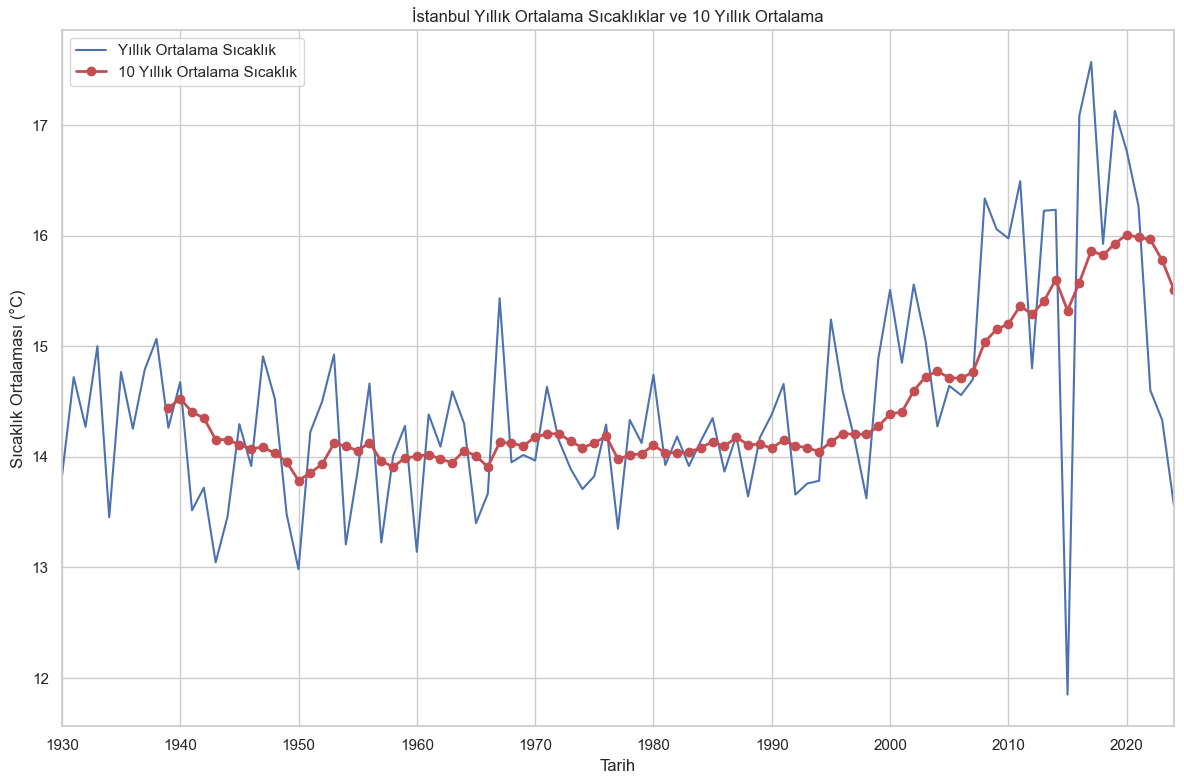

In [129]:
# Tarih sütununu datetime formatına çeviriyoruz
istanbul['time'] = pd.to_datetime(istanbul['time'])

# yıllık ortalama sıcaklıkları çekiyorum
istanbul_ortalama = istanbul.copy()
istanbul_ortalama.set_index("time", inplace=True)

# Yıllık ortalama sıcaklık hesaplaması
istanbul_ortalama = istanbul_ortalama.resample("Y").mean()

# Yıllık ortalama sıcaklık verilerini ayrı bir DataFrame olarak kaydetme
istanbul_ortalama = pd.DataFrame(istanbul_ortalama, columns=["tavg"])
istanbul_ortalama.reset_index(drop=False, inplace=True)

# 10 yıllık hareketli ortalamaları al
ten_year_avg = istanbul_ortalama["tavg"].rolling(window=10).mean()

# Grafiğin boyutunu ayarlayın
plt.figure(figsize=(12, 8))

# Arka planı beyaz yerine grid tarzı yapın
sns.set(style="whitegrid")

# Grafikleri çizdirme
plt.plot(istanbul_ortalama["time"], istanbul_ortalama["tavg"], label="Yıllık Ortalama Sıcaklık", color="b")
plt.plot(istanbul_ortalama["time"], ten_year_avg, label="10 Yıllık Ortalama Sıcaklık", linewidth=2, color="r", marker='o')

# Eksen etiketlerini ve başlığı güncelleme
plt.xlabel("Tarih")
plt.ylabel("Sıcaklık Ortalaması (°C)")
plt.title("İstanbul Yıllık Ortalama Sıcaklıklar ve 10 Yıllık Ortalama")

# İlgili yıla odaklanmak için grafiği sınırlama
plt.xlim(istanbul_ortalama["time"].iloc[0], istanbul_ortalama["time"].iloc[-1])

# Efsaneyi gösterme
plt.legend()

# Grafikleri gösterme
plt.tight_layout()
plt.show()

In [130]:
!pip install xlrd


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Emisyon ve Sıcaklık

In [131]:
# türkiye gaz emisyonlarını görsele dahil ediyorum

emisyon_tuik = pd.read_excel("sera gazi emisyonlari (milyon ton co2 esdegeri).xls")
new_column_names = {
    "Sera gazı emisyonları (CO2 eşdeğeri), 1990 - 2021": "Yıl",
    "Unnamed: 1": "Toplam",
    "Unnamed: 2": "CO2",
    "Unnamed: 3": "CH4",
    "Unnamed: 4": "N2O",
    "Unnamed: 5": "FGAZ"
}

emisyon_tuik.rename(columns=new_column_names, inplace=True)
emisyon_tuik = emisyon_tuik.iloc[3:35]
emisyon_tuik['Yıl'] = pd.to_datetime(emisyon_tuik['Yıl'], format='%Y')
emisyon_tuik.reset_index(drop=True, inplace=True)

In [132]:
emisyon_tuik

,Yıl,Toplam,CO2,CH4,N2O,FGAZ
0,1990-01-01,219.526151,151.614981,42.487543,24.950823,0.472804
1,1991-01-01,226.794721,158.126315,43.377429,24.733992,0.556985
2,1992-01-01,233.132483,164.064876,43.288202,25.25965,0.519754
3,1993-01-01,240.771746,171.138875,43.06554,26.048287,0.519045
4,1994-01-01,234.38783,167.565647,42.787878,23.570421,0.463884
5,1995-01-01,248.248909,181.355257,42.613471,23.870854,0.409326
6,1996-01-01,267.581386,199.646693,42.968946,24.54246,0.423287
7,1997-01-01,278.813841,212.108198,42.231314,24.050525,0.423804
8,1998-01-01,280.318959,212.135043,42.421875,25.338883,0.423158
9,1999-01-01,277.776799,207.927912,43.789483,25.636443,0.422961


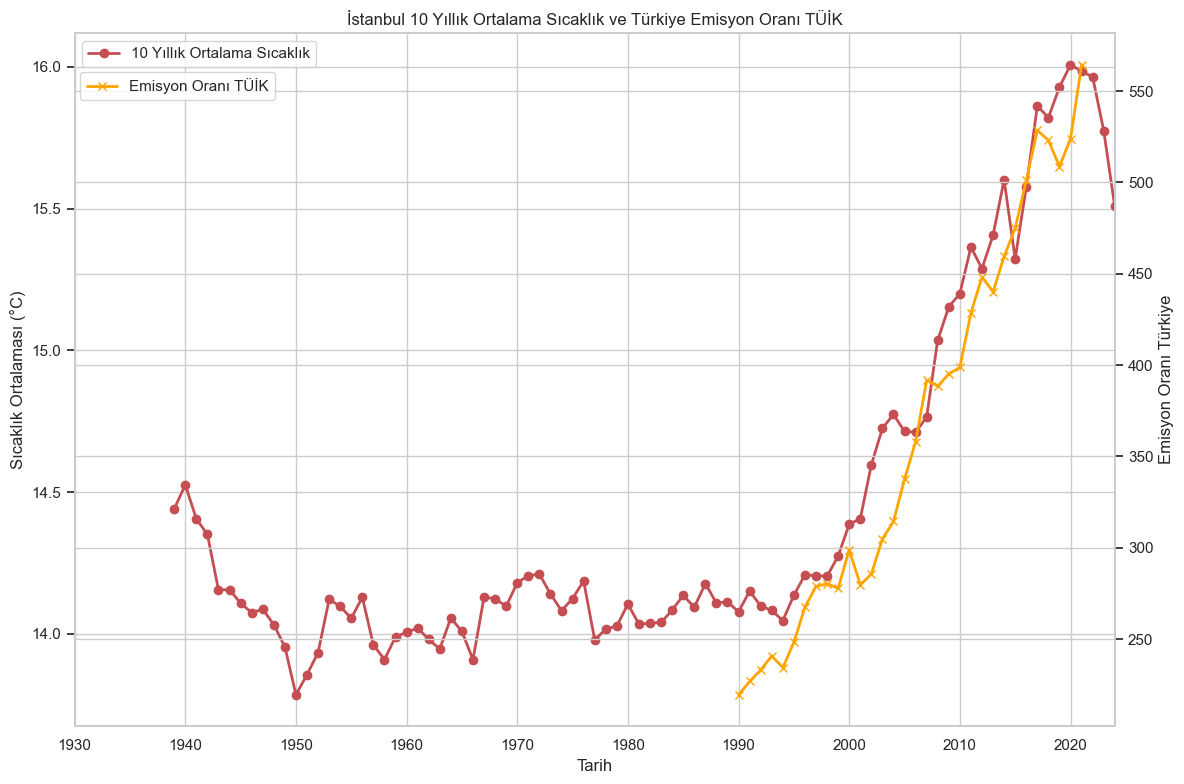

In [133]:
# Grafiğin boyutunu ayarlayın
plt.figure(figsize=(12, 8))

# Arka planı beyaz yerine grid tarzı yapın
sns.set(style="whitegrid")

# Birinci y-eksen verileri çizdirme (sıcaklık)
plt.plot(istanbul_ortalama["time"], ten_year_avg, label="10 Yıllık Ortalama Sıcaklık", linewidth=2, color="r", marker='o')

# Birinci y-eksen etiketlerini ve başlığı güncelleme
plt.xlabel("Tarih")
plt.ylabel("Sıcaklık Ortalaması (°C)")
plt.title("İstanbul 10 Yıllık Ortalama Sıcaklık ve Türkiye Emisyon Oranı TÜİK")
plt.legend()

# İlgili yıla odaklanmak için grafiği sınırlama
plt.xlim(istanbul_ortalama["time"].iloc[0], istanbul_ortalama["time"].iloc[-1])

# İkinci y-eksen verileri çizdirme (emisyon oranları)
ax2 = plt.gca().twinx()  # İkincil y-eksen oluşturma
ax2.plot(emisyon_tuik["Yıl"], emisyon_tuik["Toplam"], label="Emisyon Oranı TÜİK", linewidth=2, color="orange", marker='x')
ax2.set_ylabel("Emisyon Oranı Türkiye")  # İkincil y-eksen etiketi

plt.legend(bbox_to_anchor=(0.2, 0.9555))

# Grafikleri gösterme
plt.tight_layout()
plt.show()

In [134]:
#CAMBRIDGE VE OXFORD DESTEKLI OWID DATASINA GÖRE TR EMİSYON ORANLARINA BAKALIM
emisyon_owid = pd.read_csv("owid-co2-data.csv")

In [135]:
emisyon_owid.loc[emisyon_owid.loc[emisyon_owid.country == "Turkey"]["co2"].dropna().index].columns
emisyon_owid = emisyon_owid.loc[emisyon_owid.loc[emisyon_owid.country == "Turkey"]["co2"].dropna().index][["country","year","co2","gas_co2","methane","nitrous_oxide","oil_co2",'other_industry_co2', 'primary_energy_consumption',"consumption_co2","energy_per_capita",'total_ghg']]
emisyon_owid = emisyon_owid.fillna(0)
emisyon_owid["total"] = emisyon_owid["co2"] + emisyon_owid["methane"] + emisyon_owid["nitrous_oxide"]
emisyon_owid_tur = emisyon_owid.copy()
emisyon_owid_tur = emisyon_owid_tur[["country","year","total_ghg","total"]]
emisyon_owid_tur.loc[emisyon_owid_tur["total_ghg"]==0, "total_ghg"] = emisyon_owid_tur["total"]
emisyon_owid_tur.drop(columns="total", inplace=True)
emisyon_owid_tur['year'] = pd.to_datetime(emisyon_owid_tur['year'], format='%Y')

In [136]:
emisyon_owid_tur

,country,year,total_ghg
46368,Turkey,1865-01-01,0.150
46369,Turkey,1866-01-01,0.209
46370,Turkey,1867-01-01,0.227
46371,Turkey,1868-01-01,0.176
46372,Turkey,1869-01-01,0.267
...,...,...,...
46520,Turkey,2017-01-01,472.270
46521,Turkey,2018-01-01,470.650
46522,Turkey,2019-01-01,459.860
46523,Turkey,2020-01-01,413.433


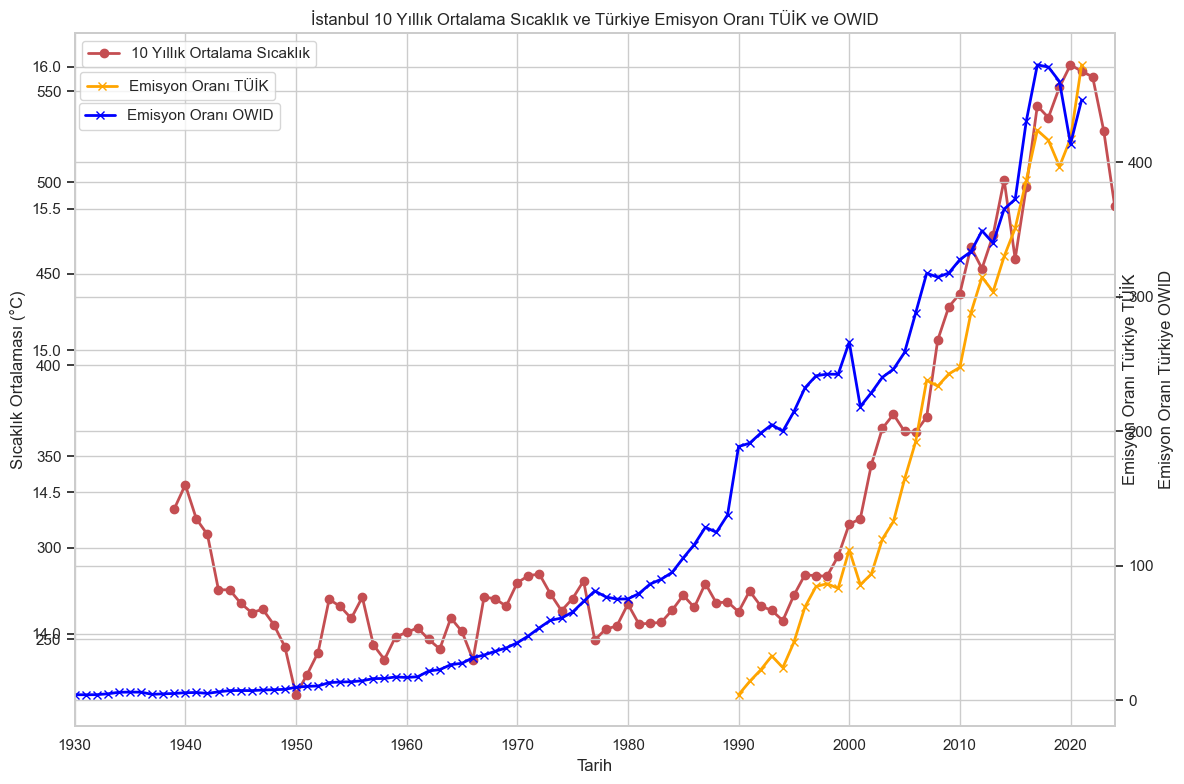

In [137]:
# Grafiğin boyutunu ayarlayın
plt.figure(figsize=(12, 8))

# Arka planı beyaz yerine grid tarzı yapın
sns.set(style="whitegrid")

# Birinci y-eksen verileri çizdirme (sıcaklık)
plt.plot(istanbul_ortalama["time"], ten_year_avg, label="10 Yıllık Ortalama Sıcaklık", linewidth=2, color="r", marker='o')

# Birinci y-eksen etiketlerini ve başlığı güncelleme
plt.xlabel("Tarih")
plt.ylabel("Sıcaklık Ortalaması (°C)")
plt.title("İstanbul 10 Yıllık Ortalama Sıcaklık ve Türkiye Emisyon Oranı TÜİK ve OWID")
plt.legend()

# İlgili yıla odaklanmak için grafiği sınırlama
plt.xlim(istanbul_ortalama["time"].iloc[0], istanbul_ortalama["time"].iloc[-1])

# İkinci y-eksen verileri çizdirme (emisyon oranları)
ax2 = plt.gca().twinx()  # İkincil y-eksen oluşturma
ax2.plot(emisyon_tuik["Yıl"], emisyon_tuik["Toplam"], label="Emisyon Oranı TÜİK", linewidth=2, color="orange", marker='x')
ax2.set_ylabel("Emisyon Oranı Türkiye TÜİK")  # İkincil y-eksen etiketi
plt.legend(bbox_to_anchor=(0.2, 0.9555))

# Üçüncü y-eksen verileri çizdirme (emisyon oranları)
ax3 = plt.gca().twinx()  
ax3.plot(emisyon_owid_tur[emisyon_owid_tur["year"] >= datetime(1930, 1, 1)]["year"], emisyon_owid_tur[emisyon_owid_tur["year"] >= datetime(1930, 1, 1)]["total_ghg"], label="Emisyon Oranı OWID", linewidth=2, color="blue", marker='x')
ax3.set_ylabel("Emisyon Oranı Türkiye OWID") 
plt.legend(bbox_to_anchor=(0.205, 0.91))


# Grafikleri gösterme
plt.tight_layout()
plt.show()

## Yeşillik ve Sıcaklık

In [138]:
yesillik_istanbul = pd.read_excel("istanbul data/2022-yeil-alan-bilgileri.xlsx")
yesillik_istanbul.drop(columns="Unnamed: 20", inplace=True)

In [139]:
dikilen_agac_istanbul = pd.melt(yesillik_istanbul.loc[yesillik_istanbul["FAALİYET KONUSU"]=="Dikilen Ağaç Sayısı"].drop(columns="BİRİM"), id_vars=["FAALİYET KONUSU"], var_name="Year", value_name="Count")
bakim_agac_istanbul = pd.melt(yesillik_istanbul.loc[yesillik_istanbul["FAALİYET KONUSU"]=="Bakımı Yapılan Ağaç Sayısı"].drop(columns="BİRİM"), id_vars=["FAALİYET KONUSU"], var_name="Year", value_name="Count")
dikilen_cali_istanbul = pd.melt(yesillik_istanbul.loc[yesillik_istanbul["FAALİYET KONUSU"]=="Dikilen Çalı Sayısı"].drop(columns="BİRİM"), id_vars=["FAALİYET KONUSU"], var_name="Year", value_name="Count")

In [140]:
dikilen_agac_istanbul['year'] = pd.to_datetime(dikilen_agac_istanbul['Year'], format='%Y')
bakim_agac_istanbul['year'] = pd.to_datetime(bakim_agac_istanbul['Year'], format='%Y')
dikilen_cali_istanbul['year'] = pd.to_datetime(dikilen_cali_istanbul['Year'], format='%Y')

In [141]:
dikilen_agac_istanbul

,FAALİYET KONUSU,Year,Count,year
0,Dikilen Ağaç Sayısı,2004,99685.0,2004-01-01
1,Dikilen Ağaç Sayısı,2005,230000.0,2005-01-01
2,Dikilen Ağaç Sayısı,2006,215000.0,2006-01-01
3,Dikilen Ağaç Sayısı,2007,216724.0,2007-01-01
4,Dikilen Ağaç Sayısı,2008,198269.0,2008-01-01
5,Dikilen Ağaç Sayısı,2009,34637.0,2009-01-01
6,Dikilen Ağaç Sayısı,2010,40048.0,2010-01-01
7,Dikilen Ağaç Sayısı,2011,72514.0,2011-01-01
8,Dikilen Ağaç Sayısı,2012,166786.0,2012-01-01
9,Dikilen Ağaç Sayısı,2013,136795.0,2013-01-01


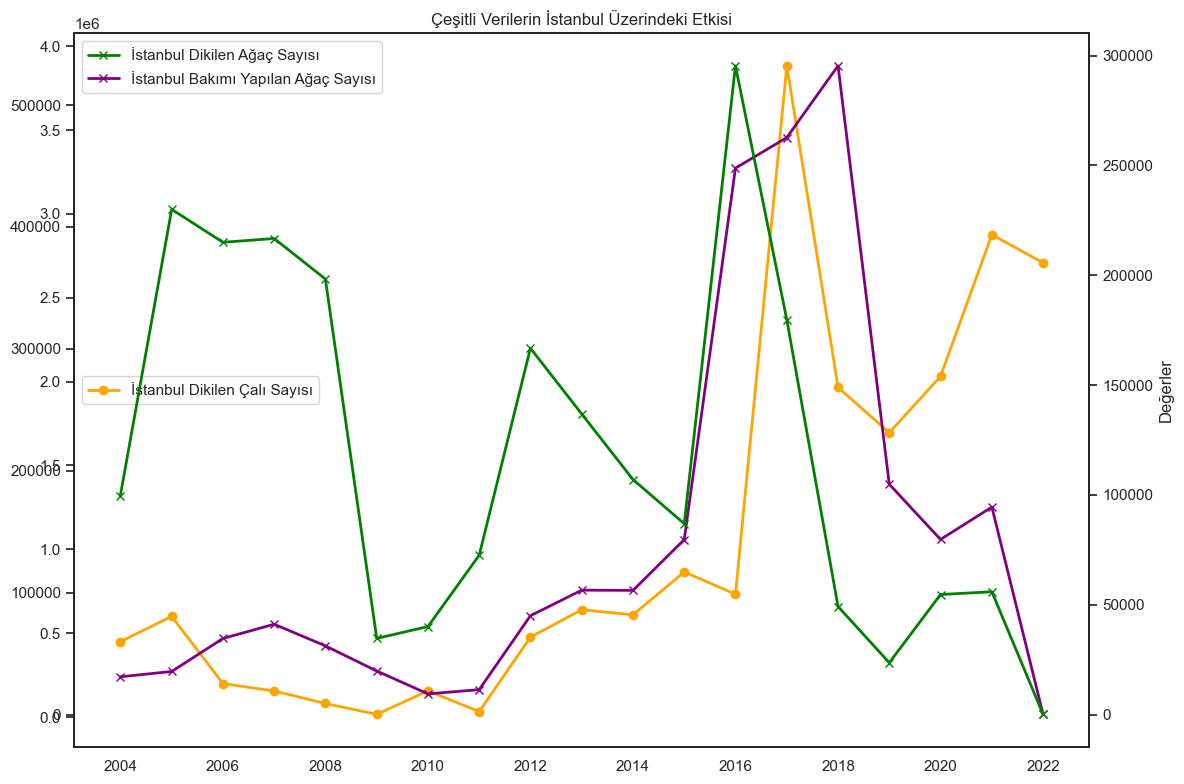

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Grafiğin boyutunu ayarlayın
plt.figure(figsize=(12, 8))

# Arka planı beyaz yerine grid tarzı yapın
sns.set_theme(style='white')

# Birinci y-eksen verileri çizdirme (sıcaklık)
plt.plot(dikilen_cali_istanbul["year"], dikilen_cali_istanbul["Count"], label="İstanbul Dikilen Çalı Sayısı", linewidth=2, color="orange", marker='o')
plt.legend(loc='center left')

# İkinci y-eksen verileri çizdirme (emisyon oranları)
ax2 = plt.gca().twinx()  
ax2.plot(bakim_agac_istanbul["year"], bakim_agac_istanbul["Count"], label="İstanbul Bakımı Yapılan Ağaç Sayısı", linewidth=2, color="purple", marker='x')

# Üçüncü y-eksen verileri çizdirme (Dikilen Ağaç Sayısı)
ax3 = plt.gca().twinx()  # İkincil y-eksen oluşturma
ax3.plot(dikilen_agac_istanbul["year"], dikilen_agac_istanbul["Count"], label="İstanbul Dikilen Ağaç Sayısı", linewidth=2, color="green", marker='x')

# Tüm y-eksen etiketlerini güncelleme
plt.ylabel("Değerler")

# Başlığı güncelleme
plt.title("Çeşitli Verilerin İstanbul Üzerindeki Etkisi")

# Tüm çizgi açıklamalarını ekleme
lines = plt.gca().get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

# Grafikleri gösterme
plt.tight_layout()
plt.show()


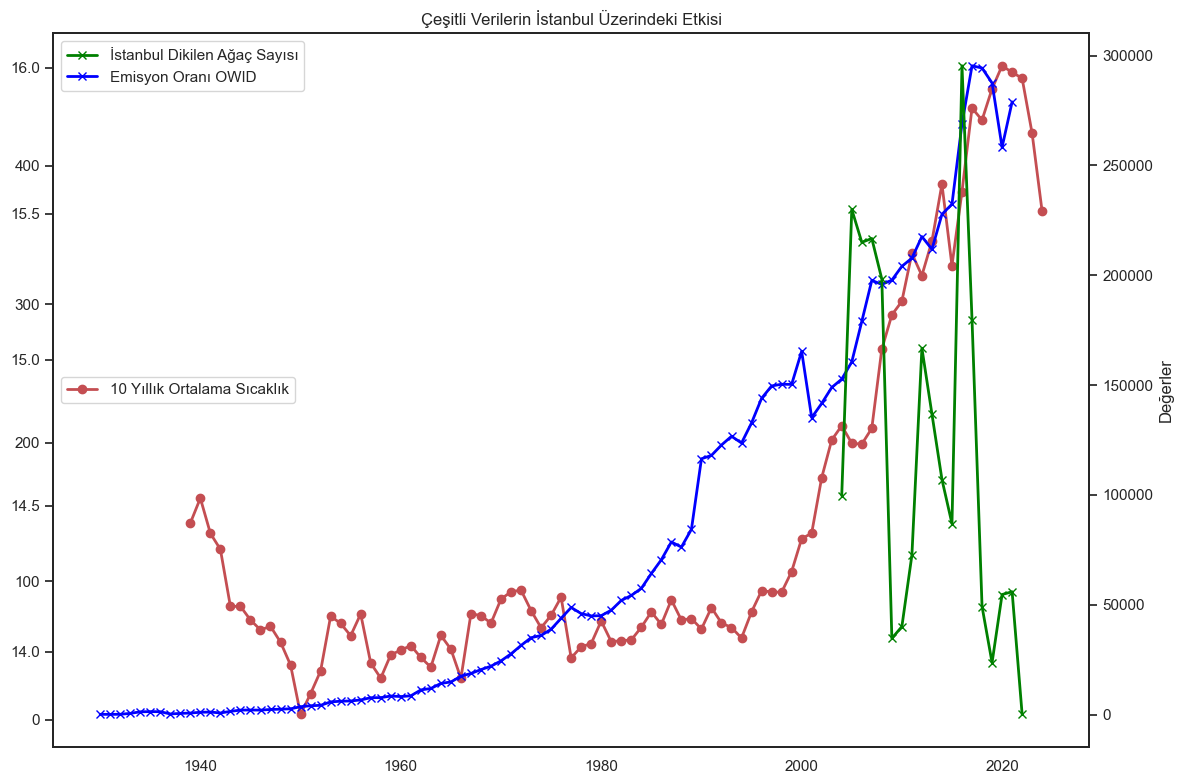

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Grafiğin boyutunu ayarlayın
plt.figure(figsize=(12, 8))

# Arka planı beyaz yerine grid tarzı yapın
sns.set_theme(style='white')

# Birinci y-eksen verileri çizdirme (sıcaklık)
plt.plot(istanbul_ortalama["time"], ten_year_avg, label="10 Yıllık Ortalama Sıcaklık", linewidth=2, color="r", marker='o')
plt.legend(loc='center left')

# İkinci y-eksen verileri çizdirme (emisyon oranları)
ax2 = plt.gca().twinx()  
ax2.plot(emisyon_owid_tur[emisyon_owid_tur["year"] >= datetime(1930, 1, 1)]["year"], emisyon_owid_tur[emisyon_owid_tur["year"] >= datetime(1930, 1, 1)]["total_ghg"], label="Emisyon Oranı OWID", linewidth=2, color="blue", marker='x')

# Üçüncü y-eksen verileri çizdirme (Dikilen Ağaç Sayısı)
ax3 = plt.gca().twinx()  # İkincil y-eksen oluşturma
ax3.plot(dikilen_agac_istanbul["year"], dikilen_agac_istanbul["Count"], label="İstanbul Dikilen Ağaç Sayısı", linewidth=2, color="green", marker='x')

# Tüm y-eksen etiketlerini güncelleme
plt.ylabel("Değerler")

# Başlığı güncelleme
plt.title("Çeşitli Verilerin İstanbul Üzerindeki Etkisi")

# Tüm çizgi açıklamalarını ekleme
lines = plt.gca().get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

# Grafikleri gösterme
plt.tight_layout()
plt.show()


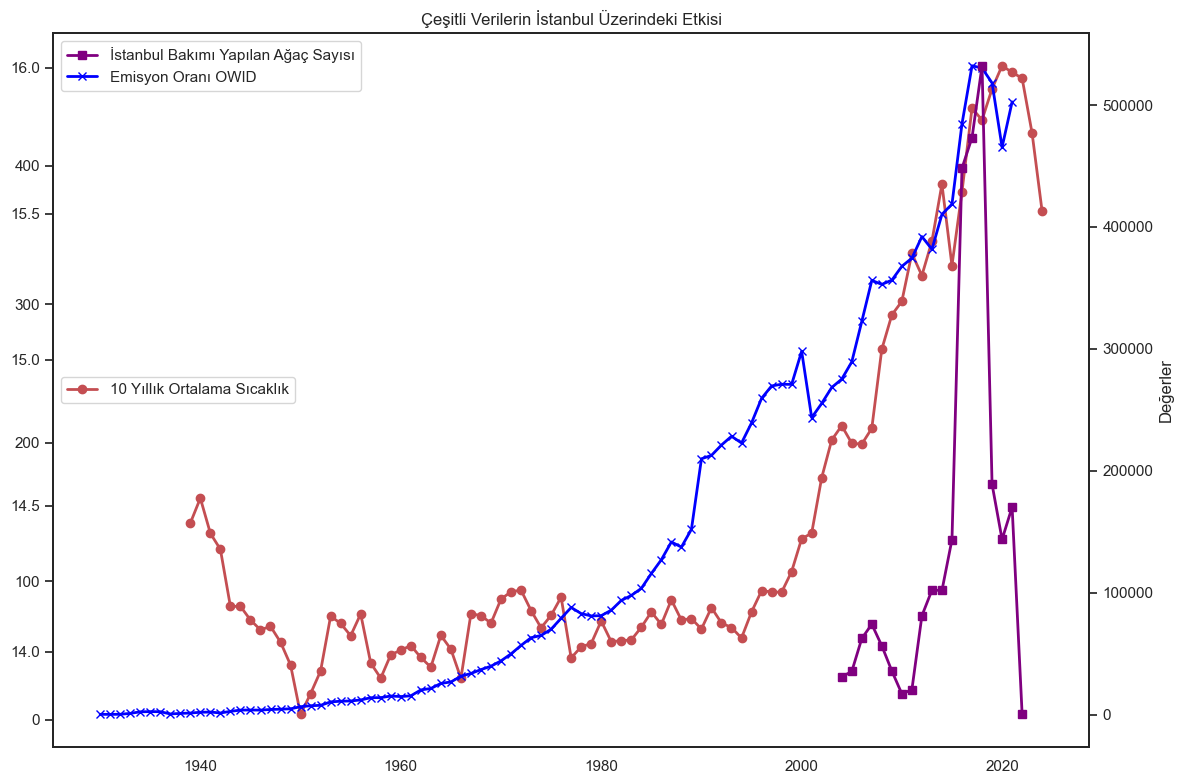

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Grafiğin boyutunu ayarlayın
plt.figure(figsize=(12, 8))

# Arka planı beyaz yerine grid tarzı yapın
sns.set_theme(style='white')

# Birinci y-eksen verileri çizdirme (sıcaklık)
plt.plot(istanbul_ortalama["time"], ten_year_avg, label="10 Yıllık Ortalama Sıcaklık", linewidth=2, color="r", marker='o')
plt.legend(loc='center left')

# İkinci y-eksen verileri çizdirme (emisyon oranları)
ax2 = plt.gca().twinx()  
ax2.plot(emisyon_owid_tur[emisyon_owid_tur["year"] >= datetime(1930, 1, 1)]["year"], emisyon_owid_tur[emisyon_owid_tur["year"] >= datetime(1930, 1, 1)]["total_ghg"], label="Emisyon Oranı OWID", linewidth=2, color="blue", marker='x')

# Üçüncü y-eksen verileri çizdirme (bakımı yapılan ağaç sayısı)
ax3 = plt.gca().twinx()
ax3.plot(bakim_agac_istanbul["year"], bakim_agac_istanbul["Count"], label="İstanbul Bakımı Yapılan Ağaç Sayısı", linewidth=2, color="purple", marker='s')

# Tüm y-eksen etiketlerini güncelleme
plt.ylabel("Değerler")

# Başlığı güncelleme
plt.title("Çeşitli Verilerin İstanbul Üzerindeki Etkisi")

# Tüm çizgi açıklamalarını ekleme
lines = plt.gca().get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

# Grafikleri gösterme
plt.tight_layout()
plt.show()


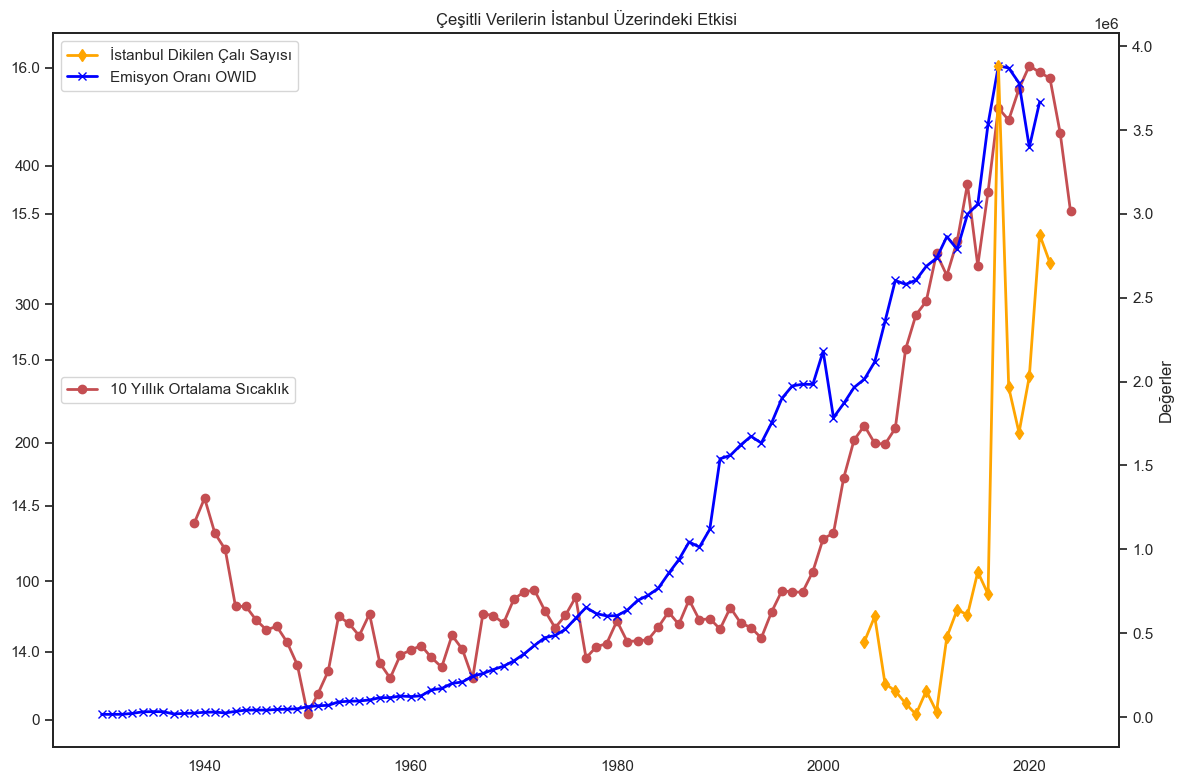

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Grafiğin boyutunu ayarlayın
plt.figure(figsize=(12, 8))

# Arka planı beyaz yerine grid tarzı yapın
sns.set_theme(style='white')

# Birinci y-eksen verileri çizdirme (sıcaklık)
plt.plot(istanbul_ortalama["time"], ten_year_avg, label="10 Yıllık Ortalama Sıcaklık", linewidth=2, color="r", marker='o')
plt.legend(loc='center left')

# İkinci y-eksen verileri çizdirme (emisyon oranları)
ax2 = plt.gca().twinx()  
ax2.plot(emisyon_owid_tur[emisyon_owid_tur["year"] >= datetime(1930, 1, 1)]["year"], emisyon_owid_tur[emisyon_owid_tur["year"] >= datetime(1930, 1, 1)]["total_ghg"], label="Emisyon Oranı OWID", linewidth=2, color="blue", marker='x')

# Üçüncü y-eksen verileri çizdirme (dikilen çalı sayısı)
ax3 = plt.gca().twinx()
ax3.plot(dikilen_cali_istanbul["year"], dikilen_cali_istanbul["Count"], label="İstanbul Dikilen Çalı Sayısı", linewidth=2, color="orange", marker='d')

# Tüm y-eksen etiketlerini güncelleme
plt.ylabel("Değerler")

# Başlığı güncelleme
plt.title("Çeşitli Verilerin İstanbul Üzerindeki Etkisi")

# Tüm çizgi açıklamalarını ekleme
lines = plt.gca().get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

# Grafikleri gösterme
plt.tight_layout()
plt.show()


## Su ve Sıcaklık

In [146]:
yagis_baraj = pd.read_excel("istanbul data/ibb_yags_verileri_2011-23.xlsx")
yagis_baraj['year'] = pd.to_datetime(yagis_baraj['Tarih'], format='%Y')

In [147]:
yagis_baraj

,Tarih,Ömerli,Darlik,Elmali,Terkos,B.çekmece,Sazlidere,Alibey,Kazandere,Pabuçdere,year
0,2011-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2011-01-01
1,2011-01-02,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2011-01-02
2,2011-01-03,0.00,0.00,0.00,0.42,1.37,0.87,0.2,2.26,1.89,2011-01-03
3,2011-01-04,8.08,10.01,11.64,18.82,9.64,14.72,13.5,8.20,10.37,2011-01-04
4,2011-01-05,2.78,8.48,7.09,3.42,0.83,4.31,4.3,1.44,1.60,2011-01-05
...,...,...,...,...,...,...,...,...,...,...,...
4468,2023-03-27,2.65,2.20,5.41,9.20,1.71,2.50,4.0,4.30,2.80,2023-03-27
4469,2023-03-28,9.66,12.00,25.87,3.20,18.89,16.25,20.3,7.10,5.40,2023-03-28
4470,2023-03-29,20.01,21.80,37.92,11.40,16.92,16.25,14.9,1.60,1.20,2023-03-29
4471,2023-03-30,3.21,1.60,3.71,1.60,2.08,1.75,2.6,0.00,0.00,2023-03-30


In [148]:
# Tarih sütununu pandas'ın datetime formatına çevirin
yagis_baraj['year'] = pd.to_datetime(yagis_baraj['year'])

# Tarihe göre gruplayıp aylık ortalama değerleri hesaplayın
yagis_baraj['month'] = yagis_baraj['year'].dt.month
yagis_baraj['year'] = yagis_baraj['year'].dt.year

In [149]:
yagis_baraj

,Tarih,Ömerli,Darlik,Elmali,Terkos,B.çekmece,Sazlidere,Alibey,Kazandere,Pabuçdere,year,month
0,2011-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2011,1
1,2011-01-02,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2011,1
2,2011-01-03,0.00,0.00,0.00,0.42,1.37,0.87,0.2,2.26,1.89,2011,1
3,2011-01-04,8.08,10.01,11.64,18.82,9.64,14.72,13.5,8.20,10.37,2011,1
4,2011-01-05,2.78,8.48,7.09,3.42,0.83,4.31,4.3,1.44,1.60,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4468,2023-03-27,2.65,2.20,5.41,9.20,1.71,2.50,4.0,4.30,2.80,2023,3
4469,2023-03-28,9.66,12.00,25.87,3.20,18.89,16.25,20.3,7.10,5.40,2023,3
4470,2023-03-29,20.01,21.80,37.92,11.40,16.92,16.25,14.9,1.60,1.20,2023,3
4471,2023-03-30,3.21,1.60,3.71,1.60,2.08,1.75,2.6,0.00,0.00,2023,3


In [170]:
# istanbul ortalama'daki aynı formatta year sütunu ekliyorum
yagis_baraj['yearS'] = pd.to_datetime(yagis_baraj['year'].astype(str) + '-12-31')

,Tarih,Ömerli,Darlik,Elmali,Terkos,B.çekmece,Sazlidere,Alibey,Kazandere,Pabuçdere,year,month,yearS
0,2011-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2011,1,2011-12-31
1,2011-01-02,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2011,1,2011-12-31
2,2011-01-03,0.00,0.00,0.00,0.42,1.37,0.87,0.2,2.26,1.89,2011,1,2011-12-31
3,2011-01-04,8.08,10.01,11.64,18.82,9.64,14.72,13.5,8.20,10.37,2011,1,2011-12-31
4,2011-01-05,2.78,8.48,7.09,3.42,0.83,4.31,4.3,1.44,1.60,2011,1,2011-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,2023-03-27,2.65,2.20,5.41,9.20,1.71,2.50,4.0,4.30,2.80,2023,3,2023-12-31
4469,2023-03-28,9.66,12.00,25.87,3.20,18.89,16.25,20.3,7.10,5.40,2023,3,2023-12-31
4470,2023-03-29,20.01,21.80,37.92,11.40,16.92,16.25,14.9,1.60,1.20,2023,3,2023-12-31
4471,2023-03-30,3.21,1.60,3.71,1.60,2.08,1.75,2.6,0.00,0.00,2023,3,2023-12-31


In [182]:
yagis_yillik_istanbul = yagis_baraj.groupby("year").sum().drop(columns="month")
yagis_yillik_istanbul.reset_index(drop=False, inplace=True)
yagis_yillik_istanbul

,year,Ömerli,Darlik,Elmali,Terkos,B.çekmece,Sazlidere,Alibey,Kazandere,Pabuçdere
0,2011,450.95,487.43,500.62,764.17,429.46,499.59,527.07,988.25,1095.06
1,2012,799.44,990.00,758.09,863.47,618.79,576.75,852.19,1046.55,1048.16
2,2013,436.51,556.56,430.61,701.69,445.87,445.24,496.72,709.73,777.00
3,2014,795.35,847.78,620.82,1253.16,586.00,796.73,919.38,1328.81,1339.93
4,2015,824.41,926.99,789.99,791.40,579.09,610.58,716.08,936.86,805.68
5,2016,798.29,946.75,765.06,748.55,519.37,665.86,803.45,998.72,807.43
6,2017,721.40,828.29,720.76,910.11,644.99,612.90,797.94,1357.73,1099.76
7,2018,842.04,814.45,546.32,1042.66,767.87,866.87,723.46,1025.59,858.58
8,2019,583.29,646.96,415.37,586.90,447.24,482.90,573.80,604.84,584.77
9,2020,903.93,638.94,783.55,869.61,791.39,675.63,795.56,643.13,710.50


In [187]:
# istanbul ortalama'daki aynı formatta year sütunu ekliyorum
yagis_yillik_istanbul['yearS'] = pd.to_datetime(yagis_yillik_istanbul['year'].astype(str) + '-12-31')

In [210]:
yagis_yillik_istanbul["TotalBaraj"]=yagis_yillik_istanbul["Ömerli"]+yagis_yillik_istanbul["Darlik"]+yagis_yillik_istanbul["Elmali"]+yagis_yillik_istanbul["Terkos"]+yagis_yillik_istanbul["B.çekmece"]+yagis_yillik_istanbul["Sazlidere"]+yagis_yillik_istanbul["Alibey"]+yagis_yillik_istanbul["Kazandere"]+yagis_yillik_istanbul["Pabuçdere"]
yagis_yillik_istanbul

,year,Ömerli,Darlik,Elmali,Terkos,B.çekmece,Sazlidere,Alibey,Kazandere,Pabuçdere,yearS,TotalBaraj
0,2011,450.95,487.43,500.62,764.17,429.46,499.59,527.07,988.25,1095.06,2011-12-31,5742.60
1,2012,799.44,990.00,758.09,863.47,618.79,576.75,852.19,1046.55,1048.16,2012-12-31,7553.44
2,2013,436.51,556.56,430.61,701.69,445.87,445.24,496.72,709.73,777.00,2013-12-31,4999.93
3,2014,795.35,847.78,620.82,1253.16,586.00,796.73,919.38,1328.81,1339.93,2014-12-31,8487.96
4,2015,824.41,926.99,789.99,791.40,579.09,610.58,716.08,936.86,805.68,2015-12-31,6981.08
5,2016,798.29,946.75,765.06,748.55,519.37,665.86,803.45,998.72,807.43,2016-12-31,7053.48
6,2017,721.40,828.29,720.76,910.11,644.99,612.90,797.94,1357.73,1099.76,2017-12-31,7693.88
7,2018,842.04,814.45,546.32,1042.66,767.87,866.87,723.46,1025.59,858.58,2018-12-31,7487.84
8,2019,583.29,646.96,415.37,586.90,447.24,482.90,573.80,604.84,584.77,2019-12-31,4926.07
9,2020,903.93,638.94,783.55,869.61,791.39,675.63,795.56,643.13,710.50,2020-12-31,6812.24


In [219]:
istanbul_ortalama.loc[istanbul_ortalama["time"] >= pd.to_datetime('2010-01-01')]

,time,tavg
81,2010-12-31,16.491667
82,2011-12-31,14.800000
83,2012-12-31,16.225000
84,2013-12-31,16.233333
85,2014-12-31,11.850000
86,2015-12-31,17.085714
87,2016-12-31,17.570000
88,2017-12-31,15.925000
89,2018-12-31,17.127273
90,2019-12-31,16.766667


In [230]:
su_tuketim_m3 = pd.read_excel("istanbul data/m3-in-total-since-1991.xlsx")
su_tuketim_yesil = pd.read_excel("istanbul data/yllara-gore-yeil-alanlar-icin-harcanan-su-miktar.xlsx")

In [233]:
su_tuketim_yesil

,Yıl,Su Tüketimi (m3)
0,2017,13417588
1,2018,13769091
2,2019,16830146
3,2020,17542920
4,2021,15199415
5,2022,18825290


In [231]:
su_tuketim_m3

,YIL,TOPLAM M3
0,1991,223190566
1,1992,254137022
2,1993,254784311
3,1994,251308053
4,1995,252420061
5,1996,327129773
6,1997,380891741
7,1998,372865412
8,1999,382178108
9,2000,389242782


In [249]:
baraj_doluluk_istanbul = pd.read_excel("istanbul data/istanbul-dams-daily-occupancy-rates.xlsx")
#totali toplayıp eleman sayısına bölüyorum
baraj_doluluk_istanbul["TotalBaraj"]=baraj_doluluk_istanbul["Ömerli"]+baraj_doluluk_istanbul["Istrancalar"]+baraj_doluluk_istanbul["Darlık"]+baraj_doluluk_istanbul["Elmalı"]+baraj_doluluk_istanbul["Terkos"]+baraj_doluluk_istanbul["Büyükçekmece"]+baraj_doluluk_istanbul["Sazlıdere"]+baraj_doluluk_istanbul["Alibey"]+baraj_doluluk_istanbul["Kazandere"]+baraj_doluluk_istanbul["Pabuçdere"]
baraj_doluluk_istanbul["TotalBaraj"]=baraj_doluluk_istanbul["TotalBaraj"]/10
#yıllık ortalamaları buluyorum
baraj_doluluk_istanbul["Tarih"] = pd.to_datetime(baraj_doluluk_istanbul["Tarih"])  # Convert "Tarih" column to datetime
baraj_doluluk_istanbul["year"] = baraj_doluluk_istanbul["Tarih"].dt.year  # Extract year from the datetime column
yillik_ort = baraj_doluluk_istanbul.groupby("year")["TotalBaraj"].mean()
baraj_doluluk_istanbul["yillik_ort"] = baraj_doluluk_istanbul["year"].map(yillik_ort)

baraj_doluluk_istanbul

,Tarih,Ömerli,Darlık,Elmalı,Terkos,Alibey,Büyükçekmece,Sazlıdere,Kazandere,Pabuçdere,Istrancalar,TotalBaraj,year,yillik_ort
0,2000-10-23,0.652551,0.750151,0.789792,0.708568,0.0000,0.521442,0.505489,0.057499,0.068553,0.110953,0.416500,2000,0.420412
1,2000-10-24,0.659731,0.773031,0.817187,0.710344,0.0000,0.521442,0.506952,0.057499,0.069092,0.077226,0.419250,2000,0.420412
2,2000-10-25,0.663327,0.787929,0.826667,0.708568,0.0000,0.519666,0.506952,0.057499,0.069361,0.105593,0.424556,2000,0.420412
3,2000-10-26,0.662608,0.793250,0.828125,0.706792,0.0000,0.517889,0.506952,0.057499,0.069624,0.114171,0.425691,2000,0.420412
4,2000-10-27,0.660450,0.795911,0.828125,0.706792,0.0000,0.516113,0.505489,0.057499,0.066667,0.114017,0.425106,2000,0.420412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8190,2023-03-27,0.562400,0.473100,0.314400,0.318300,0.1165,0.297600,0.324100,0.085900,0.090800,0.396100,0.297920,2023,0.270357
8191,2023-03-28,0.567200,0.474900,0.327100,0.319800,0.1196,0.301000,0.325300,0.085400,0.089500,0.415900,0.302570,2023,0.270357
8192,2023-03-29,0.581500,0.491100,0.374200,0.325700,0.1310,0.307700,0.327700,0.092000,0.095900,0.428700,0.315550,2023,0.270357
8193,2023-03-30,0.594700,0.508700,0.396400,0.327200,0.1409,0.309400,0.327000,0.093900,0.096800,0.425100,0.322010,2023,0.270357


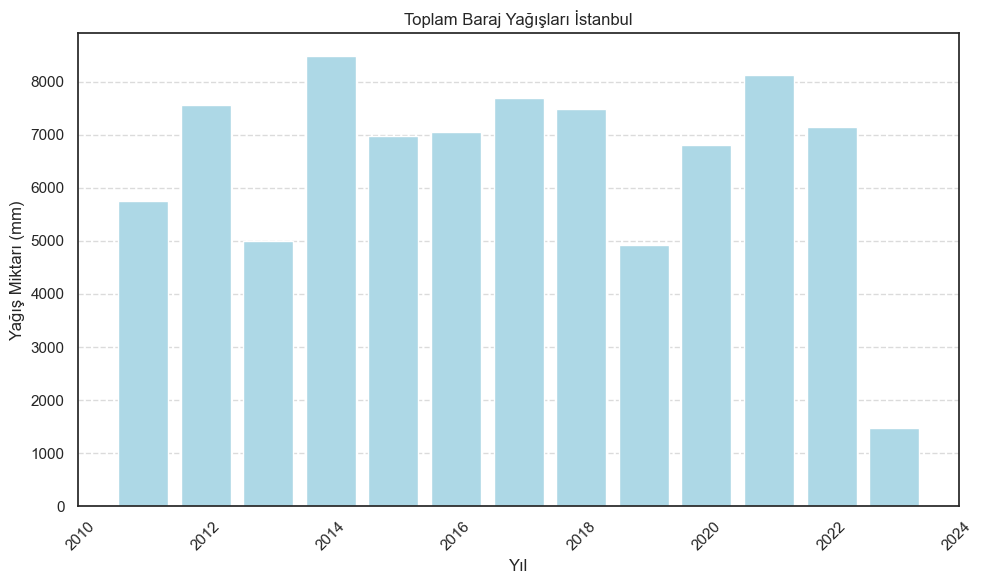

In [236]:
plt.figure(figsize=(10, 6))  # Grafik boyutunu belirleme
plt.bar(yagis_yillik_istanbul["year"], yagis_yillik_istanbul["TotalBaraj"], color="lightblue")
plt.xlabel("Yıl")
plt.ylabel("Yağış Miktarı (mm)")
plt.title("Toplam Baraj Yağışları İstanbul")
plt.xticks(rotation=45)  # Eksen etiketlerini 45 derece döndürme
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Y ekseni üzerinde ızgaralar ekler
plt.tight_layout()  # Grafik öğelerinin sığdırılması
plt.show()

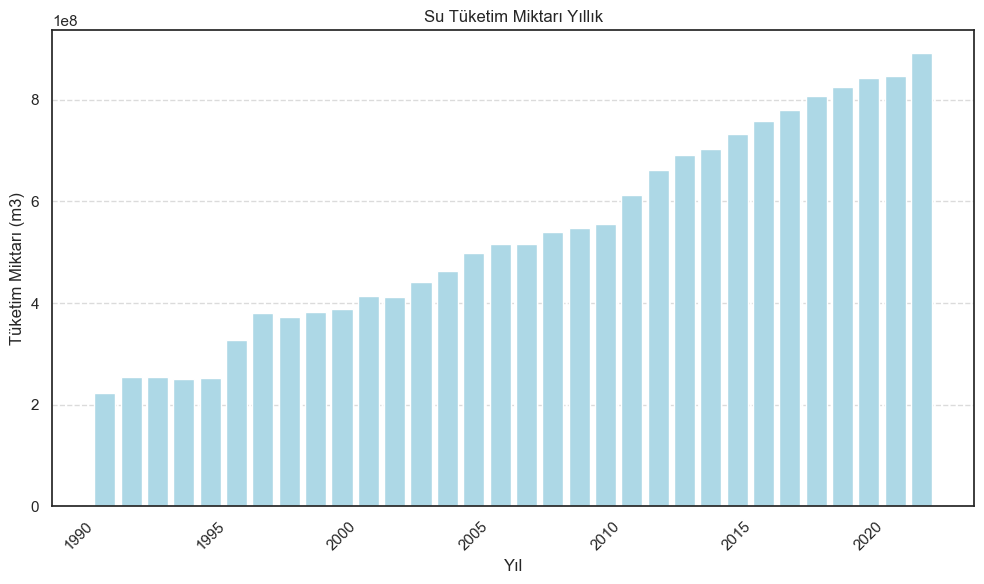

In [232]:
plt.figure(figsize=(10, 6))  # Grafik boyutunu belirleme
plt.bar(su_tuketim_m3["YIL"], su_tuketim_m3["TOPLAM M3"], color="lightblue")
plt.xlabel("Yıl")
plt.ylabel("Tüketim Miktarı (m3)")
plt.title("Su Tüketim Miktarı Yıllık")
plt.xticks(rotation=45)  # Eksen etiketlerini 45 derece döndürme
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Y ekseni üzerinde ızgaralar ekler
plt.tight_layout()  # Grafik öğelerinin sığdırılması
plt.show()

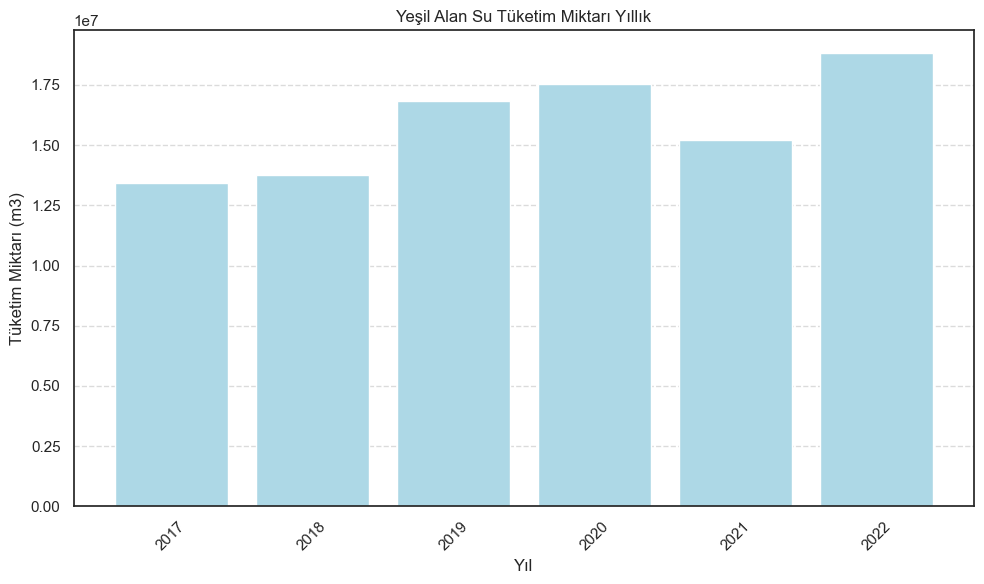

In [235]:
plt.figure(figsize=(10, 6))  # Grafik boyutunu belirleme
plt.bar(su_tuketim_yesil["Yıl"], su_tuketim_yesil["Su Tüketimi (m3)"], color="lightblue")
plt.xlabel("Yıl")
plt.ylabel("Tüketim Miktarı (m3)")
plt.title("Yeşil Alan Su Tüketim Miktarı Yıllık")
plt.xticks(rotation=45)  # Eksen etiketlerini 45 derece döndürme
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Y ekseni üzerinde ızgaralar ekler
plt.tight_layout()  # Grafik öğelerinin sığdırılması
plt.show()

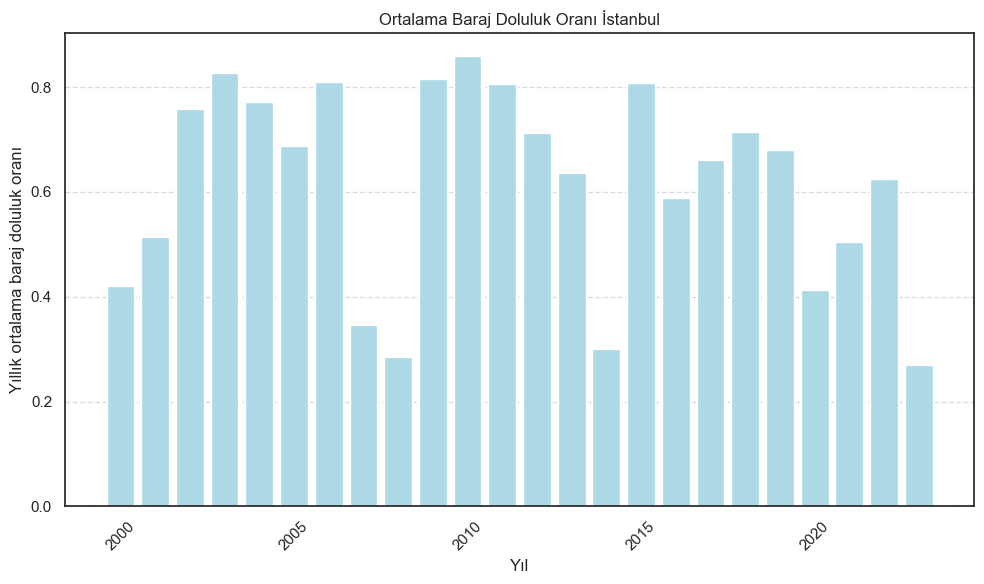

In [253]:
plt.figure(figsize=(10, 6))  # Grafik boyutunu belirleme
plt.bar(baraj_doluluk_istanbul["year"], baraj_doluluk_istanbul["yillik_ort"], color="lightblue")
plt.xlabel("Yıl")
plt.ylabel("Yıllık ortalama baraj doluluk oranı")
plt.title("Ortalama Baraj Doluluk Oranı İstanbul")
plt.xticks(rotation=45)  # Eksen etiketlerini 45 derece döndürme
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Y ekseni üzerinde ızgaralar ekler
plt.tight_layout()  # Grafik öğelerinin sığdırılması
plt.show()

## Trafik ve Sıcaklık

In [153]:
yagis_baraj

,Tarih,Ömerli,Darlik,Elmali,Terkos,B.çekmece,Sazlidere,Alibey,Kazandere,Pabuçdere,year,month
0,2011-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2011,1
1,2011-01-02,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2011,1
2,2011-01-03,0.00,0.00,0.00,0.42,1.37,0.87,0.2,2.26,1.89,2011,1
3,2011-01-04,8.08,10.01,11.64,18.82,9.64,14.72,13.5,8.20,10.37,2011,1
4,2011-01-05,2.78,8.48,7.09,3.42,0.83,4.31,4.3,1.44,1.60,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4468,2023-03-27,2.65,2.20,5.41,9.20,1.71,2.50,4.0,4.30,2.80,2023,3
4469,2023-03-28,9.66,12.00,25.87,3.20,18.89,16.25,20.3,7.10,5.40,2023,3
4470,2023-03-29,20.01,21.80,37.92,11.40,16.92,16.25,14.9,1.60,1.20,2023,3
4471,2023-03-30,3.21,1.60,3.71,1.60,2.08,1.75,2.6,0.00,0.00,2023,3
